In [1]:
import pandas as pd

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# yellow 2023 jan
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')

In [3]:
len(df.columns)

19

In [4]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime

In [5]:
df.duration = df.duration.dt.total_seconds() / 60

In [6]:
df.duration.std()

42.594351241920904

In [7]:
# % of outliers removed and left: 

len(df[(df.duration >= 1) & (df.duration <= 60)])  / len(df) * 100

df = df[(df.duration >= 1) & (df.duration <= 60)].copy()

In [8]:
df.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333


In [18]:
# one hote enconding
categorical = ['PULocationID', 'DOLocationID']
df[categorical] = df[categorical].astype(str)
train_dicts = df[categorical].to_dict(orient='records')
dv = DictVectorizer()
x_train = dv.fit_transform(train_dicts)
x_train.shape

(3009173, 515)

In [19]:
# train model
target = 'duration'
y_train = df[target].values

array([ 8.43333333,  6.31666667, 12.75      , ..., 24.51666667,
       13.        , 14.4       ])

In [23]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [25]:
y_pred = lr.predict(x_train)
print(f"Train RMSE: {mean_squared_error(y_train, y_pred, squared=False)}")

Train RMSE: 7.649261027919939


<AxesSubplot:ylabel='Count'>

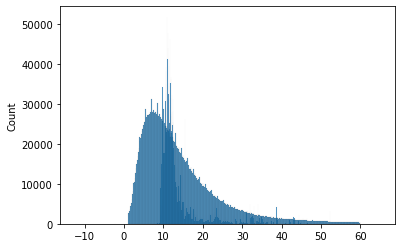

In [29]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='actual')
